# ECS7024 Statistics for Artificial Intelligence and Data Science

## Notebook 2: Aims and Outline

The overall aim of this notebook is to gain familiarity with distributions, including histograms and the summary statistics. We will ask various questions of the data and try to answer them by plotting appropriate graphs. 

 1. Section 1: Introducing the Data Set
     1. Loading the dataset
     1. More on selection
     1. Notes on the index
 
 2. Section 2: Distribution of Counts by Time of Day
     1. Total exits for all stations 
     1. Individual station
     1. Comparing stations - method 1
     1. Comparing stations - method 2 
      
 3. Section 3: Distribution of Counts by Station
     1. Distribution of the total exits
     1. Comparing distributions at different Times


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Introducing the Data Set

This notebook looks at two datasets from 2017 on entries to and exits from the London underground stations. The data was generated by Transport for London and relates to a week day. The day of the week is not specified except that it is not Saturday or Sunday. The precise data gathering process is not known but we assume they mainly used data from the automatic ticket barrier, supplemented by counts taken by staff. 

Some underground stations are also stations on the mainline railway station. In most places, there are ticket barriers that separate the passengers on the underground from those on the mainline stations. Where this is not the case, the counts may include passengers who did not use the underground. 

The pattern of travel on the underground station is not balanced. Every day (except in 2020 of course) people enter the underground in the morning near where they live and exit it near their place of work (or study). The pattern is (approximately) reversed in the evening. More people work nearer the centre of London than live there.

### Section 1.1 Loading the Data

We can load the data from the CSV file. Note that we use the first column as an index: the index behaves a bit differently from a standard column. 

In [3]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


### Section 1.2 Information About a DataFrame

There are two functions that give summary information about a data frame.

1. `info()` gives the type of each column. It is not very interesting for this dataset as the columns are all the same. 
1. `describe()` gives summary information about the distribution of each (numeric) column. 

Uncomment both of these call below to review their behaviour. 

In [4]:
exits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, Acton Town to Woodside Park
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   H05     268 non-null    int64
 1   H06     268 non-null    int64
 2   H07     268 non-null    int64
 3   H08     268 non-null    int64
 4   H09     268 non-null    int64
 5   H10     268 non-null    int64
 6   H11     268 non-null    int64
 7   H12     268 non-null    int64
 8   H13     268 non-null    int64
 9   H14     268 non-null    int64
 10  H15     268 non-null    int64
 11  H16     268 non-null    int64
 12  H17     268 non-null    int64
 13  H18     268 non-null    int64
 14  H19     268 non-null    int64
 15  H20     268 non-null    int64
 16  H21     268 non-null    int64
 17  H22     268 non-null    int64
 18  H23     268 non-null    int64
 19  H00     268 non-null    int64
 20  H01     268 non-null    int64
dtypes: int64(21)
memory usage: 46.1+ KB


In [5]:
exits.describe()

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,40.152985,310.932836,1002.500000,1830.466418,1716.802239,837.861940,654.660448,675.477612,703.645522,706.742537,...,1084.298507,1571.350746,1821.906716,1181.533582,676.231343,503.380597,470.555970,385.634328,185.380597,31.477612
std,75.432703,532.327983,1657.672341,3387.446351,3225.049818,1417.173079,1081.766928,1103.498816,1091.340830,1042.136212,...,1580.260376,2326.870125,2399.760226,1406.578872,802.860568,603.686729,597.837445,474.397707,199.524145,39.294569
min,0.000000,0.000000,9.000000,11.000000,7.000000,11.000000,8.000000,14.000000,14.000000,6.000000,...,51.000000,96.000000,85.000000,41.000000,23.000000,21.000000,15.000000,14.000000,0.000000,0.000000
25%,5.000000,50.000000,182.250000,290.000000,178.750000,115.750000,112.750000,134.750000,157.000000,188.750000,...,359.500000,500.250000,643.500000,423.500000,232.750000,177.250000,155.500000,131.500000,61.000000,6.000000
50%,12.000000,119.000000,413.500000,579.000000,447.000000,284.500000,237.500000,266.000000,312.500000,343.000000,...,611.000000,878.000000,1094.000000,733.500000,409.500000,310.000000,285.500000,237.000000,119.000000,19.000000
75%,40.000000,334.000000,1052.750000,1751.000000,1527.250000,772.000000,638.000000,647.000000,710.750000,780.000000,...,1158.500000,1677.500000,2025.250000,1393.750000,854.500000,604.500000,563.000000,477.750000,239.000000,42.500000
max,500.000000,3497.000000,12830.000000,27069.000000,22522.000000,11432.000000,8855.000000,8888.000000,8428.000000,7290.000000,...,12953.000000,23289.000000,23244.000000,12608.000000,6562.000000,4825.000000,4941.000000,3870.000000,1349.000000,296.000000


#### Exercise 1.1 Load the entries data into a second dataframe. 

### Section 1.3 More on Selection

We previously used `.loc[row]` or `.loc[row, col]` to access a row or item in a data frame. This remains the preferred method. This section mentions some more details, including other methods you may see in other code.

**Using `.loc[]`**

In [6]:
exits.loc['Mile End']          # this extracts a row as a series
type(exits.loc['Mile End'])   # try running this to see the type of the object returned

# try other examples

pandas.core.series.Series

In [7]:
exits.loc['Mile End', 'H12'] # this extracts a single value
exits.loc[:,'H09']           # try this to see what it does
exits.H09                    # we used this before; it does the same as the previous line

Station
Acton Town         448
Aldgate           3013
Aldgate East      3381
Alperton           254
Amersham            96
                  ... 
Wimbledon Park     132
Wood Green         884
Wood Lane          763
Woodford           168
Woodside Park      142
Name: H09, Length: 268, dtype: int64

**Using `.iloc[]`**

The `iloc[]` method accesses a row (and column) by number. Accessing a column in this way is more likely to be useful to us.

In [8]:
exits.iloc[4]     # this extracts the data for the 5th row; NUMBERS start from ZERO
exits.iloc[:,3]   # this extracts the data for the 4th column: H08 in this case

Station
Acton Town         812
Aldgate           3076
Aldgate East      3045
Alperton           372
Amersham           246
                  ... 
Wimbledon Park     192
Wood Green         831
Wood Lane          594
Woodford           315
Woodside Park      245
Name: H08, Length: 268, dtype: int64

**Old Fashioned but Still Popular**

The authors of Pandas encourage the use of `.loc` or `.iloc`. Instead, just `[]` can be used as the following examples show.

In [9]:
exits['H07']
exits['H07']['Aldgate']

1319

### Section 1.4: Note on the Index *(Not Essential)*

The index is not a column but behaves a bit like one. With VERY large datasets certain types of operations can be faster with indices. 

This is a complex (and confusing) area of Pandas; there is no need to master it for this module. 

In [10]:
exits.H08      # As before - use this to access one column as a series
#exits.Station # THIS DOES NOT WORK Station is no longer an attribure
exits.index    # Use this to access the index values
exits.columns  # This does the same for the columns
#exits.reset_index() # Make the index into a column

Index(['H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
       'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H00',
       'H01'],
      dtype='object')

### Section 1.5: Tall versus Wide *(Not Essential)*

The format of the London Underground is 'wide' (with multiple columns), rather than the 'tall' format used for the London Country of Birth data. 

Pandas has a comprehensive set of commands to 'reshape' data. We will avoid using many of them. However, if you prefer to have 'tall' data, the code below shows how to use `stack` to do this. 

In [11]:
exits.stack().reset_index()

,Station,level_1,0
0,Acton Town,H05,30
1,Acton Town,H06,208
2,Acton Town,H07,710
3,Acton Town,H08,812
4,Acton Town,H09,448
...,...,...,...
5623,Woodside Park,H21,342
5624,Woodside Park,H22,288
5625,Woodside Park,H23,202
5626,Woodside Park,H00,62


## Section 2: Distribution by Time of Day

We will start by looking at:
* The total exits for all stations by time of day
* The exits for separate stations by time of day.


### Section 2.1: Total Exits by Time of Day
The underground is closed between 2am and 5am in the morning (maintenance is carried out during this time). There are therefore 21 hours of operation each day. The first hour of operation starts at 5am (column is 'H05') and the last starts at 1am (column 'H01').  

The following code generates the sum of each column (corresponding to one of the hours of operation) and plots the distribution. Run this code.

<AxesSubplot:>

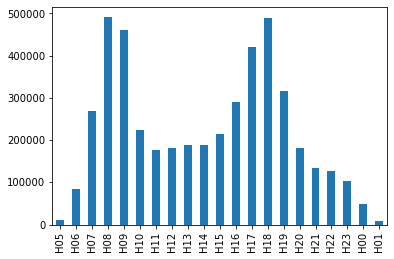

In [12]:
x_sm = exits.sum()
x_sm
x_sm.plot(kind='bar')

In [13]:
print(x_sm.mean())
#print(x_sm.median())

219434.2857142857


#### Exercise 2.1 Questions about the distribution of exits

 * Estimate the mean number of exits over all 21 hours of operation. Check your estimate using `x_sm.mean()`
 * In what sense does the distribution have a median? Unfortunately, `x_sm.median()` gives a result but it is wrong. This is explained below. 
 * The distribution is bi-modal. Would you expect the distribution for an individual station also to be bi-modal? 
 * Also, what would you expect the relative heights of the two modes to be in individual stations? Would they (always, sometimes) be equal as the network totals are?


#### Exercise 2.2 Distribution of Entries
Generate the distribution of entries (rather than exists) for the whole network 

In [14]:
entries = pd.read_csv('hourlyEntries.csv', index_col='Station')
entries

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,142,447,1079,1444,756,447,412,400,392,404,...,712,743,594,327,204,143,115,87,38,8
Aldgate,39,190,615,1310,817,374,363,468,512,544,...,1528,3109,2187,862,458,351,248,171,49,0
Aldgate East,61,204,597,1354,1185,892,845,946,1071,1101,...,1953,3237,2787,1395,953,829,656,513,181,6
Alperton,118,402,711,636,303,195,167,172,181,175,...,240,328,252,155,94,75,62,32,9,0
Amersham,79,400,1108,719,226,132,108,95,84,86,...,239,208,103,40,25,26,19,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,30,167,623,678,297,167,149,144,144,131,...,217,271,195,108,49,31,21,13,3,0
Wood Green,413,1822,2604,2689,1679,990,845,785,788,811,...,1113,1290,1018,623,407,328,379,472,72,15
Wood Lane,36,101,314,530,370,194,191,232,289,306,...,542,828,748,429,278,234,158,53,13,0


<AxesSubplot:>

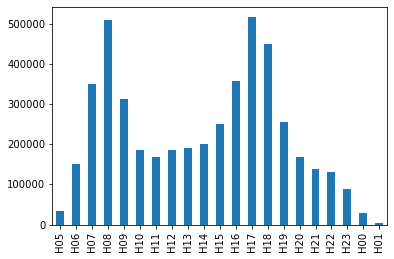

In [15]:
e_sm = entries.sum()
#e_sm
e_sm.plot(kind='bar')

#### The Problem of the Median

Given that the hour is an ordinal variable (i.e. a categorical variable with an order) we can interpret the 'median' as the hour by which time 50% of the exits have occurred. (Pandas median function does not work like this. The Scipy.stats package has a function that can be used like this.)

Instead, we calculate the cumulative distribution with the proportion of the daily total, as shown below.

In [16]:
total = x_sm.sum()
#total #4,608,120
x_cum_sm = pd.DataFrame(data=x_sm.cumsum() / total, columns=['Cumulative Proportion'])
x_cum_sm


,Cumulative Proportion
H05,0.002335
H06,0.020419
H07,0.078722
H08,0.185179
H09,0.285025
H10,0.333753
H11,0.371827
H12,0.411112
H13,0.452035
H14,0.493138


<AxesSubplot:>

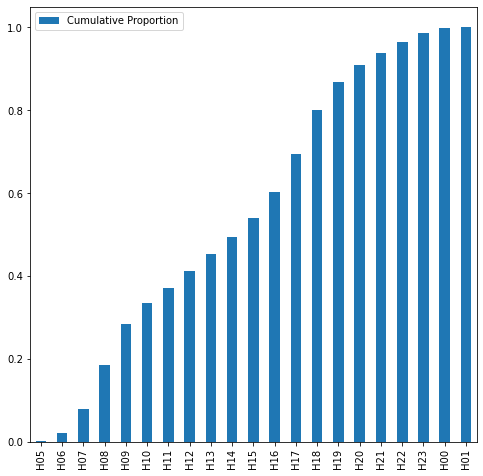

In [17]:
x_cum_sm.plot(kind='bar', figsize=(8,8))

In [18]:
#x_sm

#### Exercise 2.3 Median

Review the graph above and judge when 50% of exits have occurred. List the x_cum_sm data frame and see if this is correct.

### Section 2.2 Single Station Exists by Time of Data

In this section we want to look at and compare the distribution through the day of exists at different stations. The following code shows how to do this for one station. 

<AxesSubplot:>

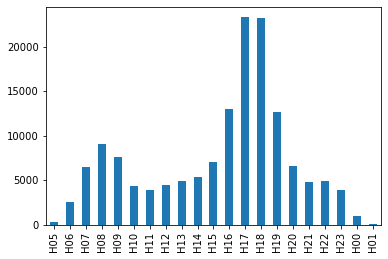

In [19]:
exits.loc['Waterloo'].plot(kind='bar')

If we try to do this for all stations it does not work. The default behaviour to to plot each column as distribution, which is not what we want. In any case, there are too many stations for one plot so we need to select a subset.

Try the following code. 

In [20]:
#exits.plot(kind='bar') #This code does not create the graph we were hoping for

### Section 2.3 Comparing Station Counts by Time of Day - Method 1

The DataFrame `.plot` method is very convenient and often does what we need. When it does not, one approach is to use the methods of `matplotlib.pyplot` directly (`DataFrame.plot` is using these methods indirectly). 

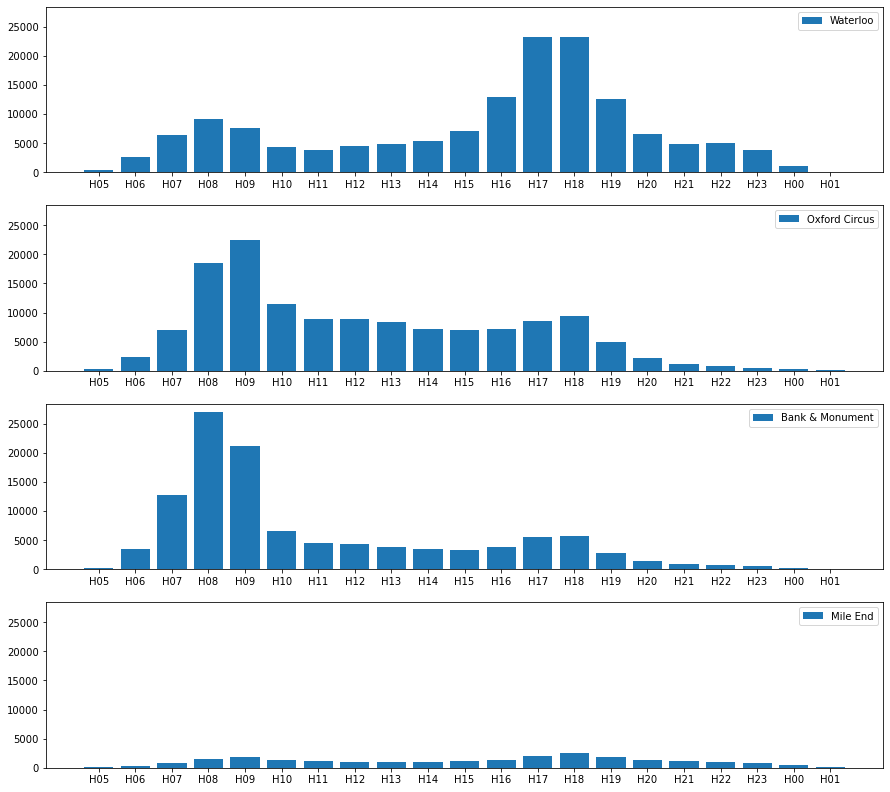

In [21]:
s1 = 'Waterloo'        # the station names from the data. you can change these
s2 = 'Oxford Circus'
s3 = 'Bank & Monument'
s4 = 'Mile End'

e1 = exits.loc[s1]    # get the row containing exits data for one station
e2  = exits.loc[s2]
e3 = exits.loc[s3]
e4 = exits.loc[s4]

# create a figure with 4 subplots (each is a 'axis'), arranged 4x1 and set the size
fig, (a1,a2,a3,a4) = plt.subplots(4, 1, figsize=(15,14), # a figure with a 4x1 grid of Axes
                                  sharey=True)           # use same scale on all vertical axes

a1.bar(e1.index, e1.values)  # plot the first station data on the first axis
a1.legend([s1])              # add a legend. this is needed because e1 is a series (not a dataframe) 

a2.bar(e2.index, e2.values)
a2.legend([s2])

a3.bar(e3.index, e3.values)
a3.legend([s3])

a4.bar(e4.index, e4.values)
a4.legend([s4])


In [22]:
#e1

In [23]:
#list(exits.index)

Note that there are fewer exists from Mile End than the other stations I have chosen. We have selected `sharey=True` which forces all the vertical scales to be the same. Try `sharey=False` to see the difference. 

#### Exercise 2.4 Try Some Other Stations
Rember you can get a complete list using `exits.index`. There is an option in Pandas that does not display the full list; try `list(exits.index)` instead.

Here are some suggestions if you do not know the London underground.
   * Main line stations in the centre of the city: Euston, London Bridge, Paddington, King's Cross St. Pancras, Liverpool Street
   * Stations nearer the ends of the line: Balham, Barking, Clapham South, Cockfosters, Wimbledon
   * Stations in shopping areas: Bond Street, Green Park, Tottenham Court Road
   * Places of work: Aldgate, Barbican, Blackfriars, Canary Wharf, Bank & Monument

### Section 2.4 Comparing Station Counts by Time of Day - Method 2

The DataFrame `.plot` method is very convenient and often does what we need. Rather than trying to change then plotting behaviour, we can instead adapt the data frame to the format expected.

It turns out that this method is easier. Some lessons
   *  Code with almost the same output can be very different
   *  You can spend (waste?) a lot of time looking for the best method
   
We first select a subset of stations. We then `transpose` or rotate the dataframe so that the station data is in the columns. Uncomment and run the code below.

#### Exercise 2.5 Transpose
Use `stations.transpose()` to view the transposed data frame, comparing it with `stations`.

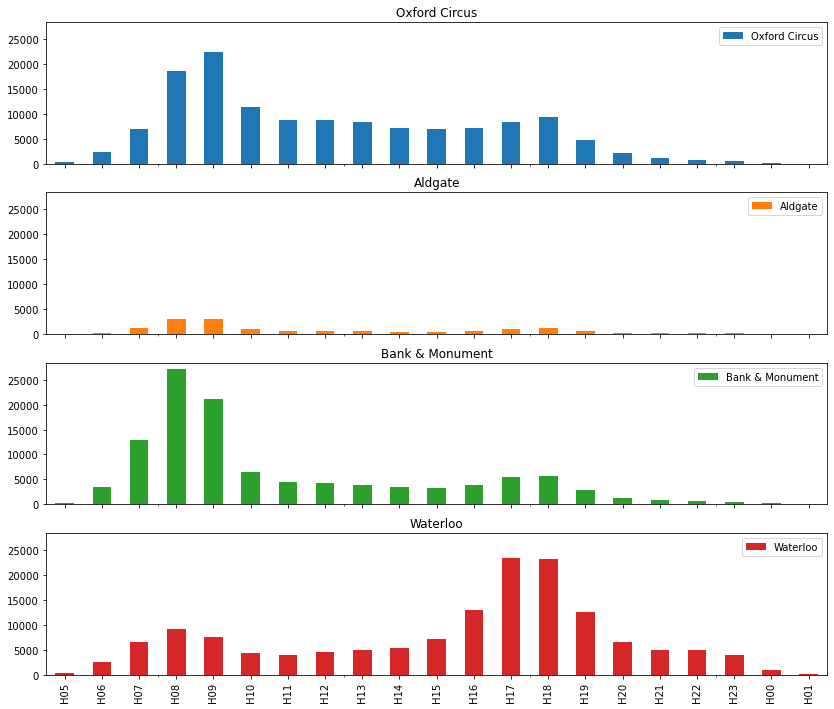

In [24]:
stations = exits.loc[['Oxford Circus','Aldgate', 'Bank & Monument', 'Waterloo']]
stations = stations.transpose()
stations
ax = stations.plot(kind='bar', subplots=True, figsize=(14,12), sharey=True)

In [25]:
stations.head()

Station,Oxford Circus,Aldgate,Bank & Monument,Waterloo
H05,366,36,277,300
H06,2432,301,3497,2568
H07,7060,1319,12830,6437
H08,18593,3076,27069,9093
H09,22522,3013,21217,7599


## Section 3: Distribution of Exits Counts by Station

The exploration in the previous section has alerted us to the two sources of variation between stations:
    1. Some stations are busier than others.
    2. Stations have a greater proportion of exits at different times of days. 

We explore this by first looking at the total numbers of exits.

### Section 3.1 Distribution of the Total Exits

In this section we look at the distribution of the total number of exists for each station. The steps are: 

- sum the rows
- plot a distribution for all stations
- plot totals for stations selected by value

The first step is to sum the rows (above we did a sum of the columns). 

In [26]:
exits.head()

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6


In [27]:
totals = pd.DataFrame().assign(Total = exits.apply(sum, axis=1))
totals

,Total
Station,
Acton Town,9362
Aldgate,16136
Aldgate East,21206
Alperton,5118
Amersham,3905
...,...
Wimbledon Park,3296
Wood Green,18989
Wood Lane,6610


In [28]:
totals2 = exits.sum(axis=1)
totals2.head()
#len(totals2)

Station
Acton Town       9362
Aldgate         16136
Aldgate East    21206
Alperton         5118
Amersham         3905
dtype: int64

A histogram can then be drawn. Use the code below to draw this and answer the questions

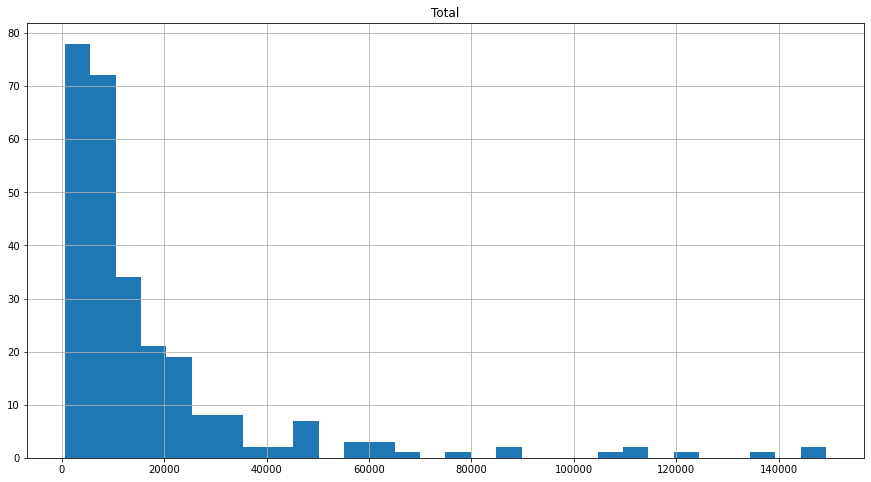

In [29]:
ax = totals.hist(bins=30, figsize=(15,8))

#### Exercise 3.1 Questions about the Distribution

1. Explain what the distribution shows. Can you label the axes?
2. The distribution is not symmetric. How is the overall shape described?
3. Suggest a possible number for the total exists which we could use to define a busy station. 

**Selecting Busy Stations** 
We can filter using the total number. The following code shows the form but the threshold is not appropriate. Choose a better one (aiming for no more than 1/3 of the stations). 

In [30]:
large = totals.loc[totals.Total > 14000].copy()
large = large.sort_values('Total',ascending=True)
len(large)
large.head()

,Total
Station,
Great Portland Street,14103
Upton Park,14383
Finchley Road,14685
Fulham Broadway,14841
White City,15275


Provided that the number of stations is not too large, it is possible to plot a bar chart. Compare this with the histogram above. What are the pro and cons in your view?

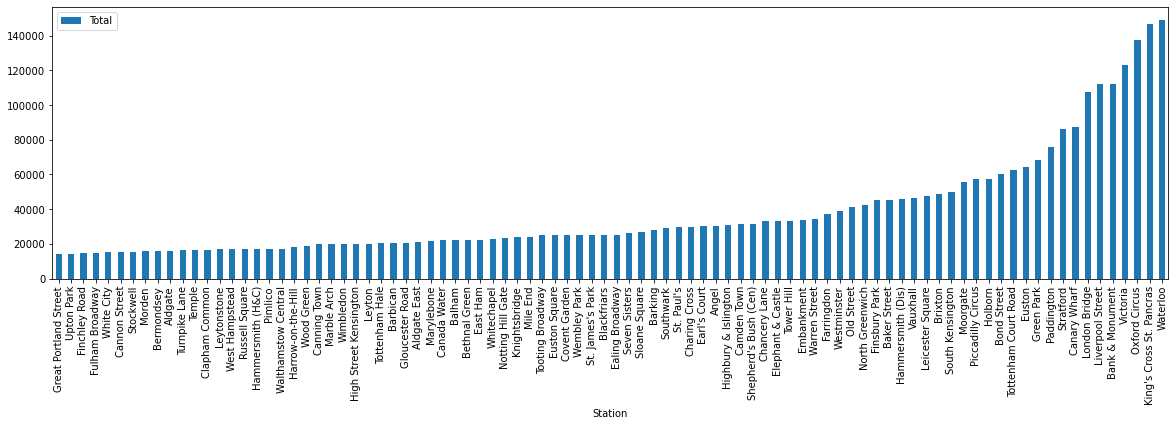

In [31]:
ax = large.plot(kind='bar', figsize=(20,5))

The distribution of the 'large' subset can also be shown. Is it still skewed?

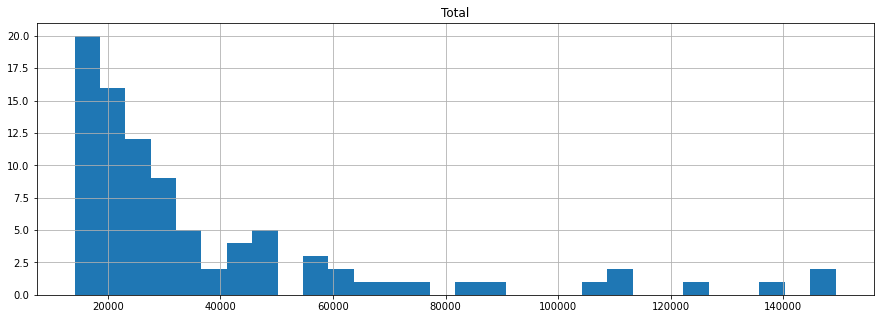

In [32]:
ax = large.hist(bins = 30, figsize=(15,5))

#### Exercise 3.2 Create Other Subsets using the Total Exits

Create other subsets, partitioning the stations into 3 or 4 subsets. You will need to use a slightly more complex expression to select stations that are neither too large nor to small.

In [33]:
small = totals.loc[totals.Total < 6000].copy()
small = small.sort_values('Total',ascending=True)
print(len(small))
small

86


,Total
Station,
Roding Valley,596
Chigwell,723
Grange Hill,1085
North Ealing,1214
Chorleywood,1315
...,...
Becontree,5682
Neasden,5697
Loughton,5853


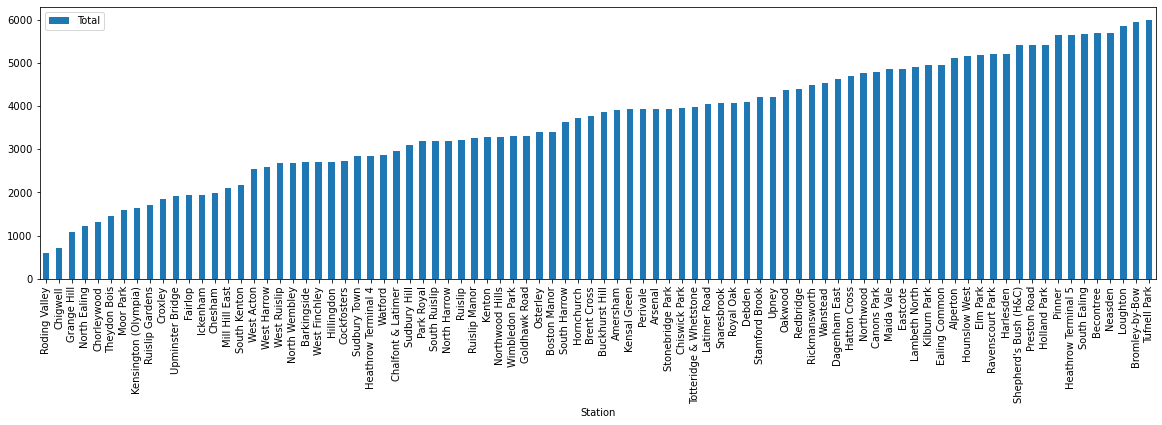

In [34]:
ax = small.plot(kind='bar', figsize=(20,5))

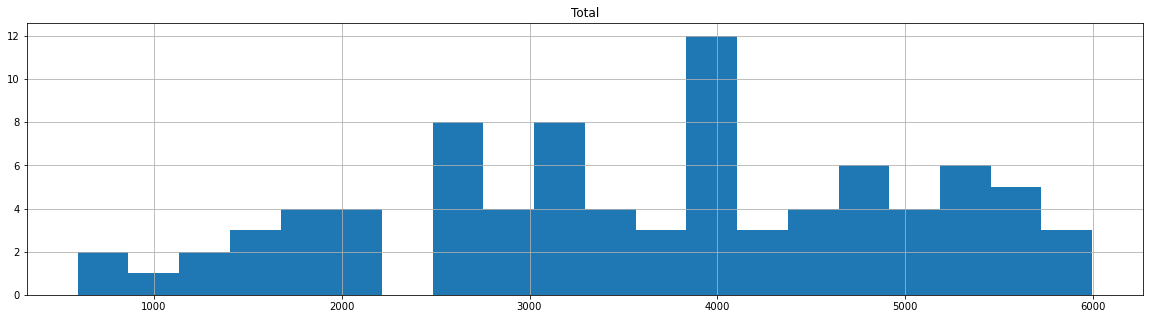

In [35]:
ax = small.hist(bins=20, figsize=(20,5))

### Section 3.2 Comparing Distributions at Different Times

Although it is clear that some stations have many more exits than others, are all the 'large' stations alike? We expect that there are different patterns of exits through the day. 

The `.hist` method allows us to select a subset of columns. In the code below, we have selected 4 'hours'. Run this and answer the questions below. 

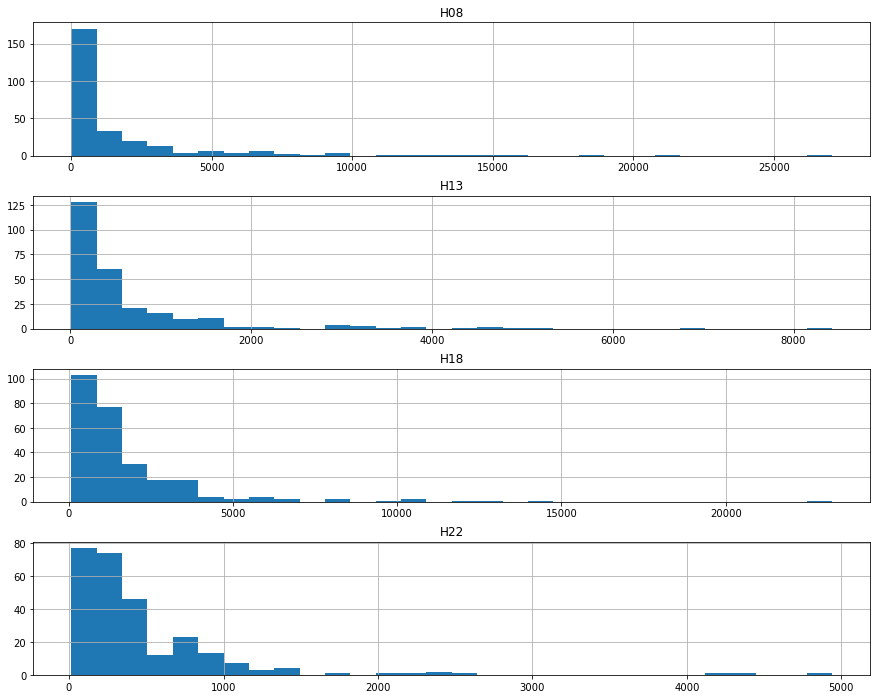

In [45]:
axes = exits.hist(figsize=(15,12), column=['H08','H13','H18','H22'], bins=30, sharex = False, layout=(4,1))

#### Exercise 3.3 Evaluating the Distributions H08, H13, H18, H22

1. Would you describe the distribution as similar or different from the distribution of the totals?
2. What is the effect of changing `sharex` to `True`?
3. Do these plots help us to understand the difference between stations with many exits in the morning and those with many exits in the evening?
4. Similar plots can also be created for stations selected by size (e.g. the 'large' ones). Create such a plot.

In [37]:
df_large = exits[exits.sum(axis=1) > 14000]
df_large.head()

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Angel,29,367,1427,3586,4512,2305,1484,1430,1382,1146,...,1317,2025,2961,2113,1046,713,574,519,258,10
Baker Street,147,795,2877,6514,6200,3373,2589,2504,2357,2093,...,2284,3256,3407,1813,998,732,703,521,213,40
Balham,22,232,866,1130,641,426,431,509,584,684,...,1481,2619,3535,2592,1531,1197,1127,994,492,93


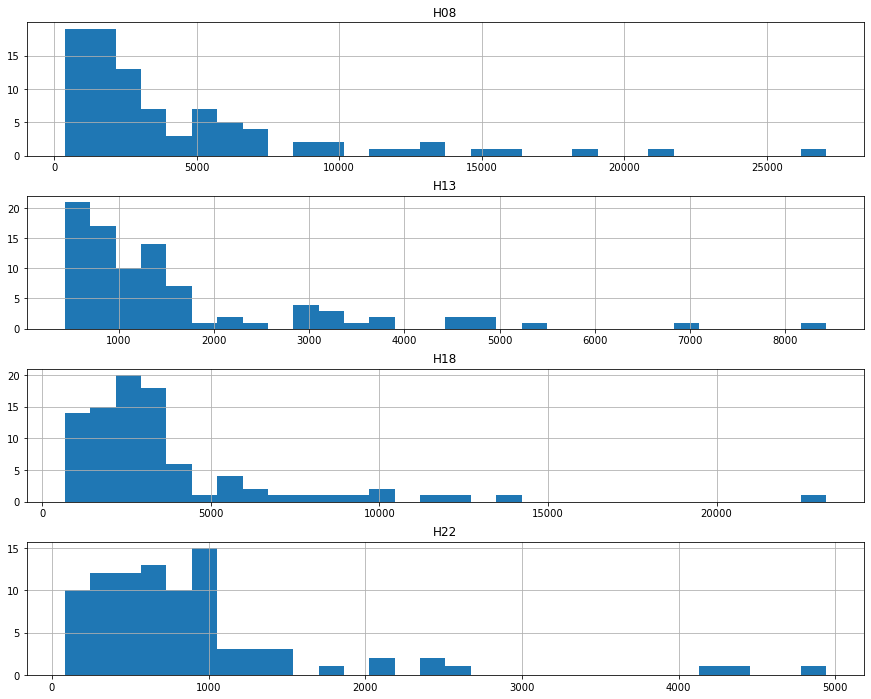

In [38]:
axes = df_large.hist(bins=30, column=['H08', 'H13', 'H18', 'H22'],layout=(4,1),figsize=(15,12),sharex=False)

**Bar Charts of Exits at Different Times**. It is also possible to create bar chart: as before, the main issue is the number of stations. 

In the first approach below, we use `.iloc` to simply select a subsequence of the stations. We combine this with `.loc` to select a subset of columns.

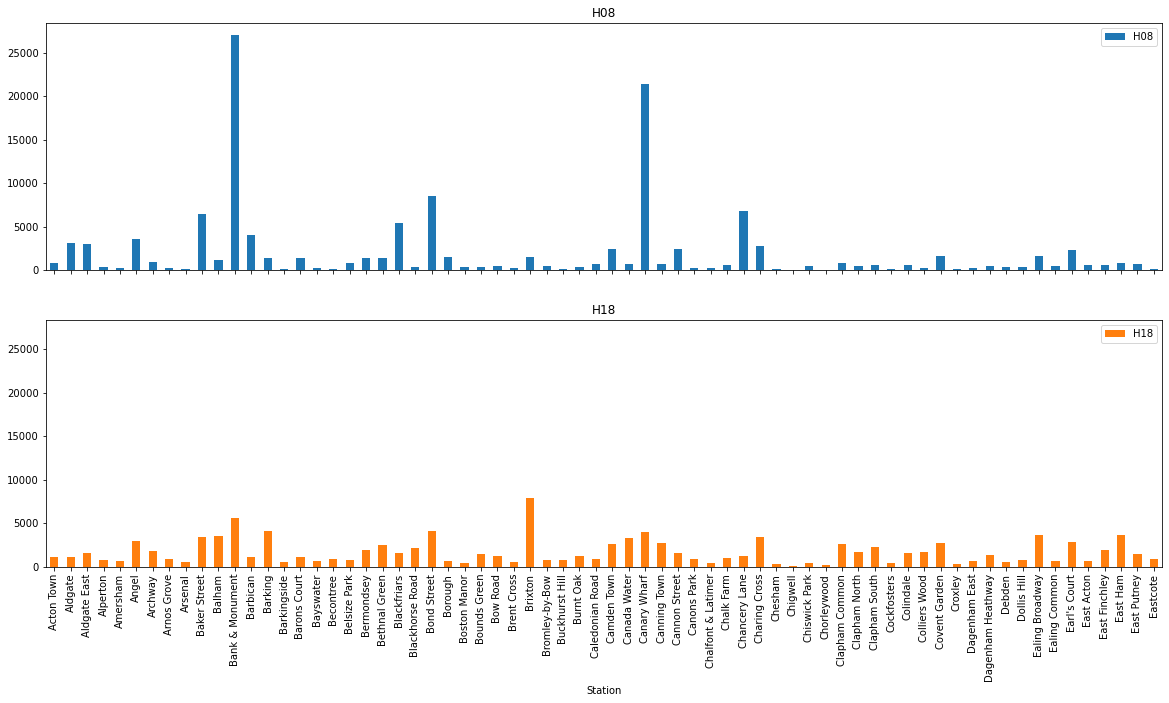

In [39]:
ax = exits.iloc[0:68].loc[:,['H08','H18']].plot(kind='bar', figsize=(20,10), sharey=True, subplots=True)

**Bar Charts of Exists at Different Times for Stations Selected by Size**

We can also use `.loc` to select stations (rows) by size and to select a subset of times (columns). 

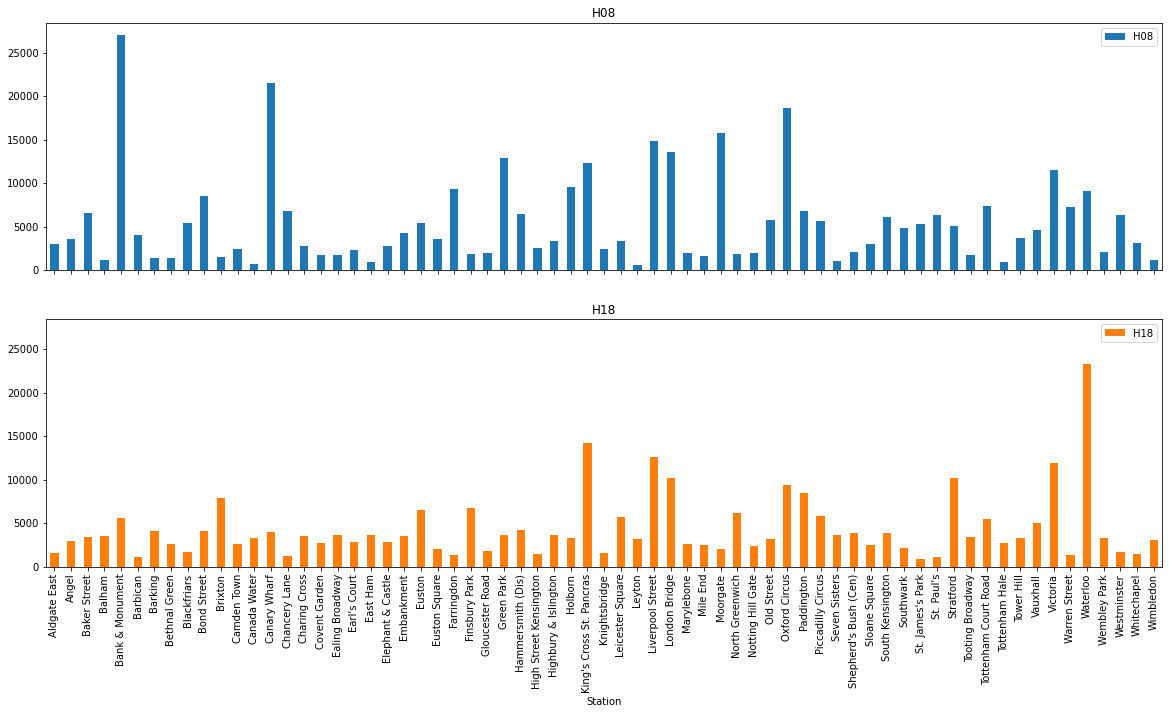

In [40]:
ax = exits.loc[totals.Total > 20000, ['H08','H18']].plot(kind='bar', figsize=(20,10), sharey=True, subplots=True)

#### Exercise 3.4 Comparing Stations at H08,  H18

1. Is the number of exits at H8 aligned (or correlated) with the number at H18? 
3. Generate the graph for other subsets as well). 
2. Summarise some of the patterns you see, identifying specific stations.

<AxesSubplot:>

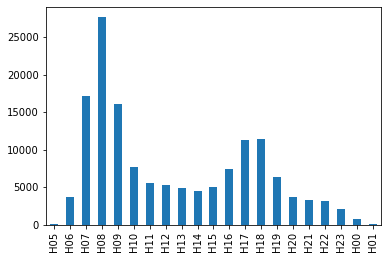

In [41]:
entries.loc['Waterloo'].plot(kind='bar')

<AxesSubplot:>

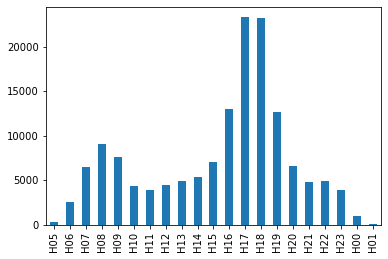

In [42]:
exits.loc['Waterloo'].plot(kind='bar')

<AxesSubplot:>

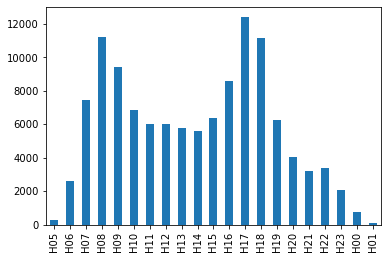

In [43]:
entries.loc['Victoria'].plot(kind='bar')

<AxesSubplot:>

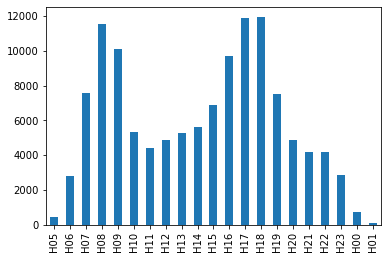

In [44]:
exits.loc['Victoria'].plot(kind='bar')